# Load and unzip data

In [1]:
import zipfile
import os
import pandas as pd
from tqdm import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder

# Define the paths
zip_file_path = r'C:\Users\Zoiya\OneDrive\Courses\HAM.zip'
extract_dir = r'C:\Users\Zoiya\OneDrive\Courses\HAM\HAM10000_images'

# Unzip the HAM.zip file to the extract directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

# Load the Metadata
metadata_path = r'C:\Users\Zoiya\OneDrive\Courses\HAM\HAM10000_metadata.csv'
data = pd.read_csv(metadata_path)

# Verify initial class distribution
print("Initial label distribution:")
print(data['dx'].value_counts())

# Fill missing 'age' values with the median
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)



Extraction complete.
Initial label distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


C:\Users\Zoiya\AppData\Local\Temp\ipykernel_6896\2686658728.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(median_age, inplace=True)


# Load all images:
    # Print which images are missing

In [2]:
# Define image directories
image_dirs = [
    r'C:\Users\Zoiya\OneDrive\Courses\HAM\HAM10000_images_part_1',
    r'C:\Users\Zoiya\OneDrive\Courses\HAM\HAM10000_images_part_2'
]

# Verify image paths and load images
valid_images = []
missing_images = []
for index, row in data.iterrows():
    img_id = row['image_id']
    img_path = None
    for dir in image_dirs:
        potential_path = os.path.join(dir, f'{img_id}.jpg')
        if os.path.exists(potential_path):
            img_path = potential_path
            break
    if img_path and os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            valid_images.append((img_id, img))
        else:
            missing_images.append(img_id)
            print(f"Failed to load image {img_id} from path: {img_path}")
    else:
        missing_images.append(img_id)
        print(f"Image {img_id} not found at path: {img_path}")

print(f"Successfully loaded {len(valid_images)} images")
print(f"Missing images: {missing_images}")


Successfully loaded 10015 images
Missing images: []


# Plot distribution

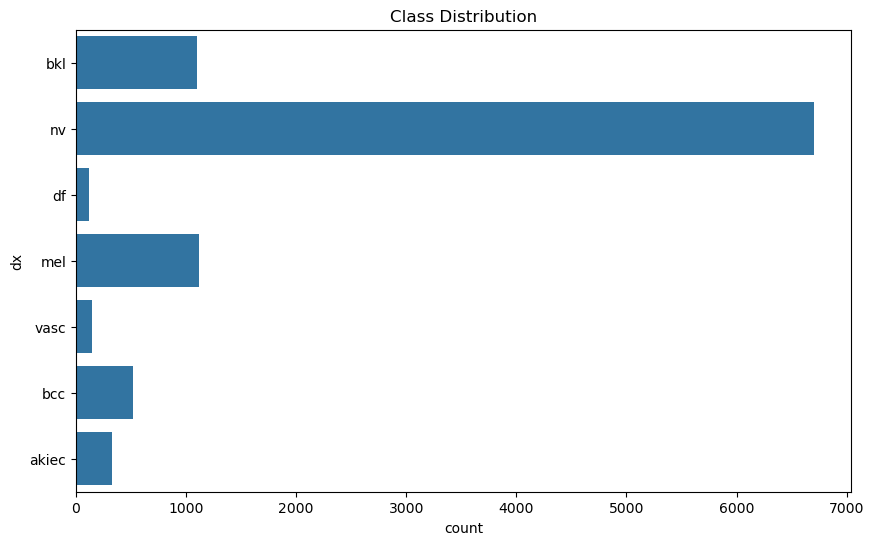

C:\Users\Zoiya\AppData\Local\Temp\ipykernel_6896\2592631748.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(median_age, inplace=True)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# View the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(data['dx'])
plt.title('Class Distribution')
plt.show()

# Fill missing 'age' values with the median
median_age = data['age'].median()
data['age'].fillna(median_age, inplace=True)


Preprocessing:

# Resample so every class has 500 maximum

In [4]:
from sklearn.utils import resample

# Group by class
grouped_data = data.groupby('dx')

# Downsample majority classes to 500 samples each, keeping minority classes as is
downsampled_data = pd.DataFrame()
for dx, group in grouped_data:
    if len(group) > 500:
        downsampled_group = resample(group, replace=False, n_samples=500, random_state=123)
    else:
        downsampled_group = group
    downsampled_data = pd.concat([downsampled_data, downsampled_group])

# Verify downsampled class distribution
print("Downsampled class distribution:")
print(downsampled_data['dx'].value_counts())


Downsampled class distribution:
dx
bcc      500
bkl      500
mel      500
nv       500
akiec    327
vasc     142
df       115
Name: count, dtype: int64


# Trying to find where the labels vanished--run these after preprocessing and SIFT

In [16]:
# Extract valid image IDs from preprocessed images
valid_image_ids = [img_data[0] for img_data in valid_images]

# Ensure valid_image_ids are correctly captured
print(f"Number of valid image IDs: {len(valid_image_ids)}")
print(f"Sample valid image IDs: {valid_image_ids[:10]}")


Number of valid image IDs: 5165
Sample valid image IDs: [array([[[20, 15, 30],
        [17, 14, 29],
        [18, 15, 30],
        ...,
        [24, 17, 32],
        [22, 15, 30],
        [22, 15, 30]],

       [[16, 16, 30],
        [17, 14, 30],
        [18, 18, 32],
        ...,
        [21, 16, 31],
        [23, 15, 32],
        [23, 16, 31]],

       [[17, 14, 29],
        [17, 14, 29],
        [18, 15, 30],
        ...,
        [24, 18, 37],
        [25, 17, 34],
        [23, 15, 32]],

       ...,

       [[40, 34, 57],
        [41, 34, 61],
        [42, 34, 64],
        ...,
        [ 0,  1,  9],
        [ 0,  1,  9],
        [ 0,  1,  9]],

       [[39, 33, 58],
        [38, 33, 60],
        [38, 33, 62],
        ...,
        [ 0,  1,  9],
        [ 0,  1,  9],
        [ 0,  1,  9]],

       [[39, 31, 61],
        [38, 33, 60],
        [38, 33, 60],
        ...,
        [ 0,  1,  9],
        [ 0,  1,  9],
        [ 0,  1,  9]]], dtype=uint8), array([[[13, 15, 26],
        [14,

In [10]:
# Filter processed data to include only valid images
final_data = processed_data[processed_data['image_id'].isin(valid_image_ids)]

# Print the count of each label after preprocessing and filtering
print("Label count after preprocessing and filtering:")
print(final_data['dx'].value_counts())


Label count after preprocessing and filtering:
Series([], Name: count, dtype: int64)


In [11]:
# Ensure no rows are dropped inadvertently
if len(processed_data) != len(final_data):
    print(f"Warning: {len(processed_data) - len(final_data)} rows were dropped during filtering.")


In [ ]:
# Convert numpy arrays to lists
valid_image_ids = [img_id.tolist() if isinstance(img_id, np.ndarray) else img_id for img_id in valid_image_ids]

# Proceed with the debugging steps
missing_ids = set(processed_data['image_id']) - set(valid_image_ids)
print(f"Missing image IDs count: {len(missing_ids)}")
print(f"Sample missing IDs: {list(missing_ids)[:10]}")


In [ ]:
# Ensure all image IDs are stripped of any leading/trailing spaces
processed_data['image_id'] = processed_data['image_id'].str.strip()
valid_image_ids = [img_id.strip() if isinstance(img_id, str) else img_id for img_id in valid_image_ids]

# Check for consistent formatting
print(f"Sample processed image IDs: {processed_data['image_id'].head()}")
print(f"Sample valid image IDs after stripping: {valid_image_ids[:10]}")


In [ ]:
# Investigate missing IDs further
missing_ids_sample = list(missing_ids)[:10]
print("Investigating sample missing IDs:")
for img_id in missing_ids_sample:
    print(f"Missing ID: {img_id}")
    if img_id in processed_data['image_id'].values:
        print(f" - Exists in processed_data")
    if img_id in valid_image_ids:
        print(f" - Exists in valid_image_ids")


# Do not run above steps until after completing all below steps until the "Training Models" section

# Compute class weights using total samples/(number of classes x number of samples in class)

In [5]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(downsampled_data['dx'].values)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels_encoded), y=labels_encoded)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class Weights:", class_weight_dict)

Class Weights: {0: 1.128877238968982, 1: 0.7382857142857143, 2: 0.7382857142857143, 3: 3.2099378881987577, 4: 0.7382857142857143, 5: 0.7382857142857143, 6: 2.5995975855130786}


# Preprocess images
    # Check which images are missing or valid
    # Augment images by...
        # Resizing them all to 224 x 224, (best for ResNet)
        # Grayscale
        # Normalize pixel values
        # 

In [11]:
!pip install imgaug

   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
    -------------------------------------- 20.5/948.0 kB 640.0 kB/s eta 0:00:02
   ------ --------------------------------- 143.4/948.0 kB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 481.3/948.0 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------  942.1/948.0 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 18.0 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 15.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 13.1 MB/s eta 0:00:00


Preprocessing Images: 100%|████████████████████████████████████████████████████████| 2584/2584 [00:50<00:00, 51.34it/s]


Successfully preprocessed 2584 images
Missing images: []


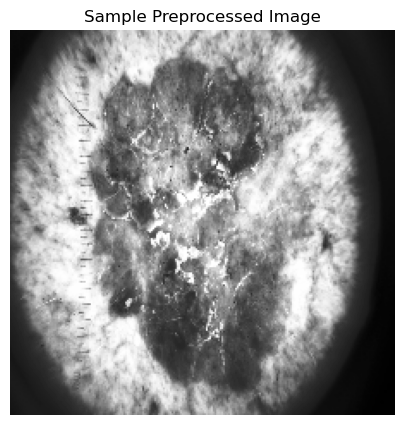

In [6]:
import cv2
import os
from tqdm import tqdm
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

# Define image directories
image_dirs = [
    r'C:\Users\Zoiya\OneDrive\Courses\HAM\HAM10000_images_part_1',
    r'C:\Users\Zoiya\OneDrive\Courses\HAM\HAM10000_images_part_2'
]

# Verify image paths and preprocess images
valid_images = []
preprocessed_images = []
missing_images = []

# Define augmentations
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flip
    iaa.Flipud(0.2),  # vertical flip
    iaa.Add((-10, 10)),  # change brightness
    iaa.Multiply((0.8, 1.2))  # change contrast
])

def preprocess_image(img, target_size=(224, 224)):
    img_resized = cv2.resize(img, target_size)
    grayscale_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    equalized_img = cv2.equalizeHist(grayscale_img)
    normalized_img = equalized_img / 255.0  # Normalize
    normalized_img = np.expand_dims(normalized_img, axis=-1)
    augmented_img = augmentation_pipeline(image=img_resized)
    return grayscale_img, normalized_img, augmented_img

for index, row in tqdm(downsampled_data.iterrows(), total=downsampled_data.shape[0], desc="Preprocessing Images"):
    img_id = row['image_id']
    img_path = None
    for dir in image_dirs:
        potential_path = os.path.join(dir, f'{img_id}.jpg')
        if os.path.exists(potential_path):
            img_path = potential_path
            break
    if img_path and os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            original_img = img  # Save the original image before any processing
            grayscale_img, normalized_img, augmented_img = preprocess_image(img)
            preprocessed_images.append(normalized_img)  # Preprocessed image for SIFT
            valid_images.append((original_img, grayscale_img, normalized_img))  # Track valid images
        else:
            missing_images.append(img_id)
            print(f"Failed to load image {img_id} from path: {img_path}")
    else:
        missing_images.append(img_id)
        print(f"Image {img_id} not found at path: {img_path}")

print(f"Successfully preprocessed {len(preprocessed_images)} images")
print(f"Missing images: {missing_images}")

# Display a sample preprocessed image
plt.figure(figsize=(5, 5))
plt.imshow(preprocessed_images[0].squeeze(), cmap='gray')
plt.title('Sample Preprocessed Image')
plt.axis('off')
plt.show()


Capturing SIFT Embeddings: 100%|███████████████████████████████████████████████████| 2584/2584 [01:04<00:00, 39.95it/s]


Padded 2581 embeddings successfully.
Padded SIFT embeddings saved to padded_sift_embeddings.npy


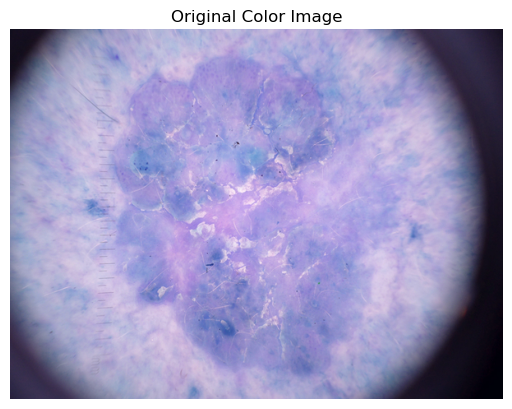

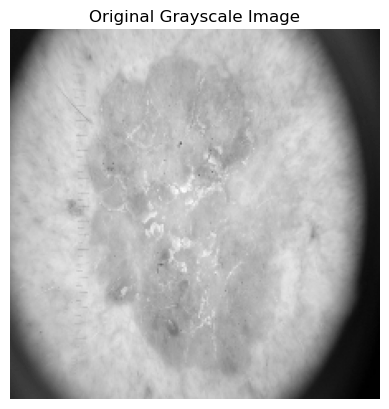

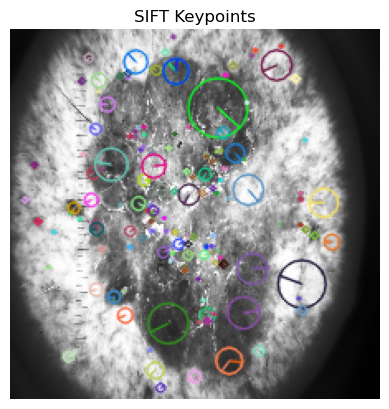

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Use SIFT to capture embeddings and ensure they're non-empty
def capture_sift_embeddings(img, contrast_threshold=0.1, edge_threshold=20, sigma=1.2):
    sift = cv2.SIFT_create(contrastThreshold=contrast_threshold, edgeThreshold=edge_threshold, sigma=sigma)
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if keypoints is not None and descriptors is not None:
        return keypoints, descriptors
    else:
        return None, None

# Function to display an image
def display_image(image, title="Image", cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Capture SIFT embeddings for all preprocessed images
all_embeddings = []
for img in tqdm(preprocessed_images, desc="Capturing SIFT Embeddings"):
    if img is not None:
        # Ensure the image is in the correct format (CV_8U)
        img_uint8 = (img.squeeze() * 255).astype(np.uint8)
        keypoints, descriptors = capture_sift_embeddings(img_uint8)
        if descriptors is not None:
            all_embeddings.append(descriptors)
            valid_images.append((img_uint8, keypoints))  # Keep track of valid images and keypoints

# Check if embeddings list is empty or contains only None
if not all_embeddings or all(all_emb is None for all_emb in all_embeddings):
    print("No valid embeddings found. Please check the images and SIFT processing.")
else:
    # Proceed with padding if embeddings are valid
    max_length = max([desc.shape[0] for desc in all_embeddings if desc is not None])
    padded_embeddings = np.array([np.pad(desc, ((0, max_length - desc.shape[0]), (0, 0)), 'constant') if desc is not None else np.zeros((max_length, 128)) for desc in all_embeddings])
    print(f"Padded {len(padded_embeddings)} embeddings successfully.")

    # Save the padded embeddings for future use
    embeddings_path = 'padded_sift_embeddings.npy'
    np.save(embeddings_path, padded_embeddings)
    print(f"Padded SIFT embeddings saved to {embeddings_path}")
    
# For debugging: Display keypoints on one valid image
if valid_images:
    original_img, grayscale_img, img_uint8 = valid_images[0]
    keypoints, descriptors = capture_sift_embeddings((img_uint8.squeeze() * 255).astype(np.uint8))
    img_with_keypoints = cv2.drawKeypoints((img_uint8.squeeze() * 255).astype(np.uint8), keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    # Display original color image
    display_image(original_img, title="Original Color Image", cmap=None)
    
    # Display original grayscale image
    display_image(grayscale_img, title="Original Grayscale Image", cmap='gray')
    
    # Display image with SIFT keypoints
    display_image(img_with_keypoints, title="SIFT Keypoints")


# Training Models:

In [14]:
# Flatten SIFT embeddings
flattened_embeddings = [emb.flatten() for emb in padded_embeddings]

# Convert to numpy array
flattened_embeddings = np.array(flattened_embeddings)

print(f"Shape of flattened embeddings: {flattened_embeddings.shape}")


Shape of flattened embeddings: (2581, 207104)


In [24]:
from sklearn.model_selection import train_test_split

# Load the labels from the downsampled dataset
labels = downsampled_data['dx'].values  # Use the labels from the downsampled dataset

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Assuming you have flattened the padded SIFT embeddings
flattened_embeddings = padded_embeddings.reshape(padded_embeddings.shape[0], -1)

# Create train/test split with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(flattened_embeddings, labels_encoded, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [2583, 2584]

# SVM:

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"SVM Accuracy: {svm_model.score(X_test, y_test)}")
print(f"SVM AUC-ROC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr')}")


SVM Classification Report:
              precision    recall  f1-score   support

       akiec       0.42      0.21      0.28        67
         bcc       0.28      0.62      0.39       101
         bkl       0.43      0.09      0.15       100
          df       0.00      0.00      0.00        29
         mel       0.33      0.26      0.29        95
          nv       0.33      0.59      0.42        92
        vasc       0.00      0.00      0.00        33

    accuracy                           0.32       517
   macro avg       0.26      0.25      0.22       517
weighted avg       0.31      0.32      0.27       517



C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.3191489361702128
SVM AUC-ROC: 0.6504021369536336


# KNN:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
y_pred_prob = knn_model.predict_proba(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"KNN Accuracy: {knn_model.score(X_test, y_test)}")
print(f"KNN AUC-ROC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr')}")


KNN Classification Report:
              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        67
         bcc       0.00      0.00      0.00       101
         bkl       0.23      0.07      0.11       100
          df       0.25      0.03      0.06        29
         mel       0.22      0.09      0.13        95
          nv       0.19      0.67      0.29        92
        vasc       0.06      0.21      0.10        33

    accuracy                           0.17       517
   macro avg       0.14      0.16      0.10       517
weighted avg       0.14      0.17      0.11       517



C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy: 0.16634429400386846
KNN AUC-ROC: 0.49080137635192267


# Random Forest:

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Random Forest Accuracy: {rf_model.score(X_test, y_test)}")
print(f"Random Forest AUC-ROC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr')}")


Random Forest Classification Report:
              precision    recall  f1-score   support

       akiec       0.28      0.16      0.21        67
         bcc       0.29      0.55      0.38       101
         bkl       0.21      0.13      0.16       100
          df       0.00      0.00      0.00        29
         mel       0.24      0.29      0.26        95
          nv       0.29      0.32      0.30        92
        vasc       0.00      0.00      0.00        33

    accuracy                           0.26       517
   macro avg       0.18      0.21      0.19       517
weighted avg       0.23      0.26      0.23       517

Random Forest Accuracy: 0.26499032882011603
Random Forest AUC-ROC: 0.6251842221314566


C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Tree:

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Decision Tree Accuracy: {dt_model.score(X_test, y_test)}")
print(f"Decision Tree AUC-ROC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr')}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

       akiec       0.24      0.24      0.24        67
         bcc       0.26      0.25      0.25       101
         bkl       0.20      0.20      0.20       100
          df       0.00      0.00      0.00        29
         mel       0.19      0.21      0.20        95
          nv       0.22      0.26      0.24        92
        vasc       0.09      0.06      0.07        33

    accuracy                           0.21       517
   macro avg       0.17      0.17      0.17       517
weighted avg       0.20      0.21      0.20       517

Decision Tree Accuracy: 0.20696324951644102
Decision Tree AUC-ROC: 0.5187333256979012


# XGBoost:

In [17]:
!pip install xgboost

In [18]:
from scipy.sparse import csr_matrix
import xgboost as xgb

# Convert to sparse matrix
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Train XGBoost model with sparse matrices
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_sparse, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test_sparse)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"XGBoost Accuracy: {xgb_model.score(X_test, y_test)}")


XGBoost Classification Report:
              precision    recall  f1-score   support

       akiec       0.28      0.13      0.18        67
         bcc       0.28      0.43      0.34       101
         bkl       0.20      0.18      0.19       100
          df       0.00      0.00      0.00        29
         mel       0.23      0.32      0.27        95
          nv       0.33      0.40      0.36        92
        vasc       0.00      0.00      0.00        33

    accuracy                           0.26       517
   macro avg       0.19      0.21      0.19       517
weighted avg       0.23      0.26      0.24       517



C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost Accuracy: 0.17408123791102514


# CNN--no SIFT:

In [19]:
# Reshape flattened embeddings back to original shape
reshaped_embeddings = flattened_embeddings.reshape(-1, max_length, 128)
print(f"Shape of reshaped embeddings: {reshaped_embeddings.shape}")


Shape of reshaped embeddings: (2584, 1384, 128)


In [20]:
# Create train/test split with the reshaped embeddings
X_train, X_test, y_train, y_test = train_test_split(reshaped_embeddings, labels_encoded, test_size=0.2, random_state=42)


In [21]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load and preprocess images
def preprocess_image_cnn(img, target_size=(224, 224)):
    img = cv2.resize(img, target_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=-1)
    return img

# Verify image loading and preprocess
preprocessed_images_cnn = []
valid_labels = []
for index, row in final_data.iterrows():
    img_id = row['image_id']
    img_path = None
    for dir in image_dirs:
        potential_path = os.path.join(dir, f'{img_id}.jpg')
        if os.path.exists(potential_path):
            img_path = potential_path
            break
    if img_path and os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            preprocessed_img = preprocess_image_cnn(img)
            preprocessed_images_cnn.append(preprocessed_img)
            valid_labels.append(row['dx'])
        else:
            print(f"Failed to load image {img_id} from path: {img_path}")

print(f"Successfully preprocessed {len(preprocessed_images_cnn)} images")

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(valid_labels)

# Train/test split for CNN
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(preprocessed_images_cnn, labels_encoded, test_size=0.2, random_state=42)

# Define CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(np.array(X_train_cnn), np.array(y_train_cnn), epochs=20, batch_size=32, validation_split=0.1)

# Evaluate CNN model
cnn_metrics = cnn_model.evaluate(np.array(X_test_cnn), np.array(y_test_cnn))
print(f"CNN Accuracy: {cnn_metrics[1]}")

# Predict and evaluate CNN
y_pred_prob_cnn = cnn_model.predict(np.array(X_test_cnn))
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)

print("CNN Classification Report:")
print(classification_report(y_test_cnn, y_pred_cnn, target_names=label_encoder.classes_))
print(f"CNN AUC-ROC: {roc_auc_score(y_test_cnn, y_pred_prob_cnn, multi_class='ovr')}")


Successfully preprocessed 10015 images


C:\Users\Zoiya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 65s 270ms/step - accuracy: 0.6264 - loss: 1.8437 - val_accuracy: 0.6970 - val_loss: 0.9495
Epoch 2/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 84s 371ms/step - accuracy: 0.6701 - loss: 1.0415 - val_accuracy: 0.7107 - val_loss: 0.8976
Epoch 3/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 354ms/step - accuracy: 0.6881 - loss: 0.9852 - val_accuracy: 0.7232 - val_loss: 0.8668
Epoch 4/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 88s 390ms/step - accuracy: 0.7025 - loss: 0.8751 - val_accuracy: 0.7157 - val_loss: 0.8942
Epoch 5/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 80s 356ms/step - accuracy: 0.7415 - loss: 0.7624 - val_accuracy: 0.7282 - val_loss: 0.9114
Epoch 6/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 84s 370ms/step - accuracy: 0.7852 - loss: 0.6166 - val_accuracy: 0.7195 - val_loss: 1.0245
Epoch 7/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 88s 388ms/step - accuracy: 0.8448 - loss: 0.4699 - val_accuracy: 0.7244 - val_loss: 1.0689
Epoch 8/20
226/226 ━━━━━━━━━━━━━━━━━━━━ 81s 357ms/step - accuracy: 0.8775 - loss: 0

C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# CNN with SIFT:

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D

# Define CNN model using SIFT embeddings
cnn_sift_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(max_length, 128)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_sift_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_sift_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

# Evaluate CNN model
cnn_sift_metrics = cnn_sift_model.evaluate(X_test, y_test)
print(f"CNN with SIFT Embeddings Accuracy: {cnn_sift_metrics[1]}")

# Predict and evaluate CNN with SIFT embeddings
y_pred_prob_cnn_sift = cnn_sift_model.predict(X_test)
y_pred_cnn_sift = np.argmax(y_pred_prob_cnn_sift, axis=1)

print("CNN with SIFT Embeddings Classification Report:")
print(classification_report(y_test, y_pred_cnn_sift, target_names=label_encoder.classes_))
print(f"CNN with SIFT Embeddings AUC-ROC: {roc_auc_score(y_test, y_pred_prob_cnn_sift, multi_class='ovr')}")


C:\Users\Zoiya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.1849 - loss: 55.2951 - val_accuracy: 0.2271 - val_loss: 1.9410
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1844 - loss: 1.9681 - val_accuracy: 0.2319 - val_loss: 1.9200
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1978 - loss: 1.9153 - val_accuracy: 0.2367 - val_loss: 1.9094
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2016 - loss: 1.9055 - val_accuracy: 0.2367 - val_loss: 1.8933
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1806 - loss: 1.8952 - val_accuracy: 0.1836 - val_loss: 1.8828
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1965 - loss: 1.8800 - val_accuracy: 0.1836 - val_loss: 1.8758
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2004 - loss: 1.8790 - val_accuracy: 0.1836 - val_loss: 1.8654
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1994 - loss: 1.8624 - val_accuracy: 0.1836 - 

C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Zoiya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
